In [85]:
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt

# 2.1
D = 0.07 # m
v_1 = 1 / (1.6e3 * D)
v_2 = 1 / (1.6e3 * 10 * D)

print("v_1 = ", v_1)
print("v_2 = ", v_2)

# 2.2
beta = 3 * np.pi * 1.7e-5
# print beta in scientific notation
print("beta = ", "{:.2e}".format(beta))

# 2.3
R = 0.002 * 0.05 * 1300 / 12
print("R = ", R)

# 2.4
gamma = np.pi /  16 * 1.29
print("gamma = ", gamma)

# 2.29
vel = 50 * np.tanh(9.8*30/50)
print("vel = ", vel)

v_1 =  0.008928571428571428
v_2 =  0.0008928571428571428
beta =  1.60e-04
R =  0.010833333333333334
gamma =  0.2532909076956771
vel =  49.999218923627495


In [86]:
# 2.31
t = 20.2/9.8*np.arccosh(np.exp(9.8*30/np.square(20.2)))
print(t)
print(20.2 * np.tanh(9.8*t/20.2))

2.7794008666766197
17.648343374105472


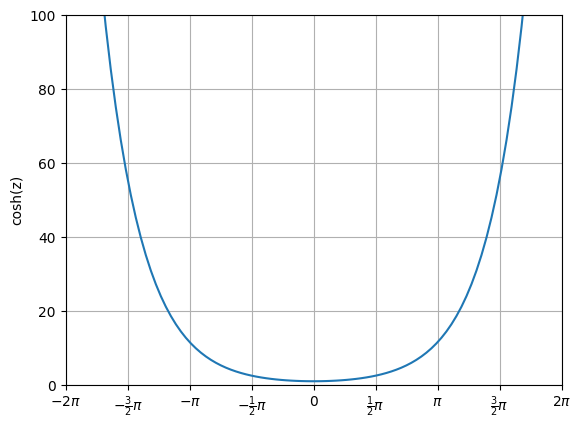

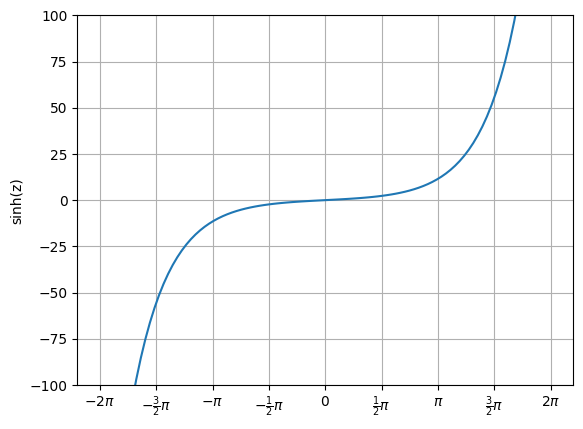

In [87]:
# plot of cosh and sinh function on separate graphs
z = np.linspace(-2*np.pi, 2*np.pi, 100)
ticks = np.arange(-2*np.pi, 2.5*np.pi, np.pi/2)
labels = [r'$-2\pi$', r'$-\frac{3}{2}\pi$', r'$-\pi$', r'$-\frac{1}{2}\pi$', r'$0$',
          r'$\frac{1}{2}\pi$', r'$\pi$', r'$\frac{3}{2}\pi$', r'$2\pi$']
plt.plot(z, np.cosh(z))
plt.ylabel('cosh(z)')
plt.ylim(0, 100)
plt.xlim(-2*np.pi, 2*np.pi)
plt.xticks(ticks, labels)
plt.grid(True)  # add grid lines
plt.show()

# sinh function
plt.figure(2)
plt.plot(z, np.sinh(z))
plt.ylabel('sinh(z)')
plt.ylim(-100, 100)
plt.xticks(ticks, labels)
plt.grid(True)  # add grid lines
plt.show()

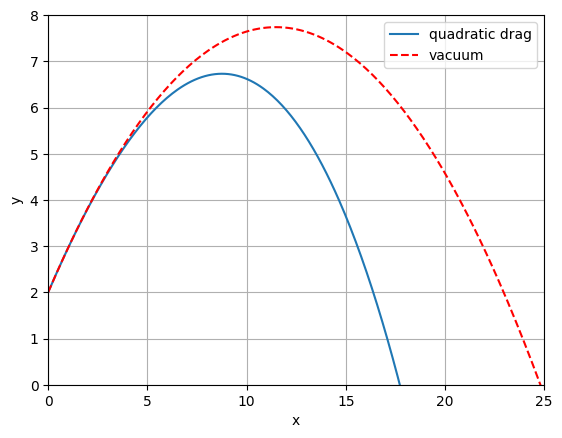

range =  17.741443936603282
range_vac =  24.844292311959776


In [88]:
# 2.43
# initial conditions
v_xo = 15 * np.sin(np.pi/4)
v_yo = v_xo
x_o = 0
y_o = 2

# constants
gamma = 0.25
g = 9.8
m = 0.6
D = 0.24
c = gamma * D ** 2
v_t = np.sqrt(m*g/c)

# time
t = np.linspace(0, 10, 1000)

# differential equations
def soe(t, s):
    x = s[0]
    y = s[1]
    v_x = s[2]
    v_y = s[3]
    dxdt = v_x
    dydt = v_y
    dv_xdt = -c/m * v_x * np.sqrt(v_x**2 + v_y**2)
    dv_ydt = -g - c/m * v_y * np.sqrt(v_x**2 + v_y**2)
    return [dxdt, dydt, dv_xdt, dv_ydt]

# solveing the differential equations
sol = sp.integrate.solve_ivp(soe, [0, 10], [x_o, y_o, v_xo, v_yo], t_eval=t)

# equation of motion in a vacuum
x_vac = v_xo * t
y_vac = y_o + v_yo * t - 0.5 * g * t**2

# plot the results
plt.plot(sol.y[0], sol.y[1])
plt.plot(x_vac, y_vac, 'r--') # solution in a vacuum
plt.ylim(0, 8)
plt.xlim(0, 25)
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.legend(['quadratic drag', 'vacuum'])
plt.show()

# calculate the range when y = 0
# find the index of the first value of y that is less than zero
idx = np.where(sol.y[1] < 0)[0][0]

# calculate the range
range = sol.y[0][idx]
print("range = ", range)

# another way to calculate the range
it = np.nditer(sol.y[1], flags=['f_index']) 
for i in it:
    if i < 0:
        # print("range = ", sol.y[0][it.index])
        break

# range in a vacuum
index = np.where(y_vac < 0)[0][0]
range_vac = x_vac[index]
print("range_vac = ", range_vac)

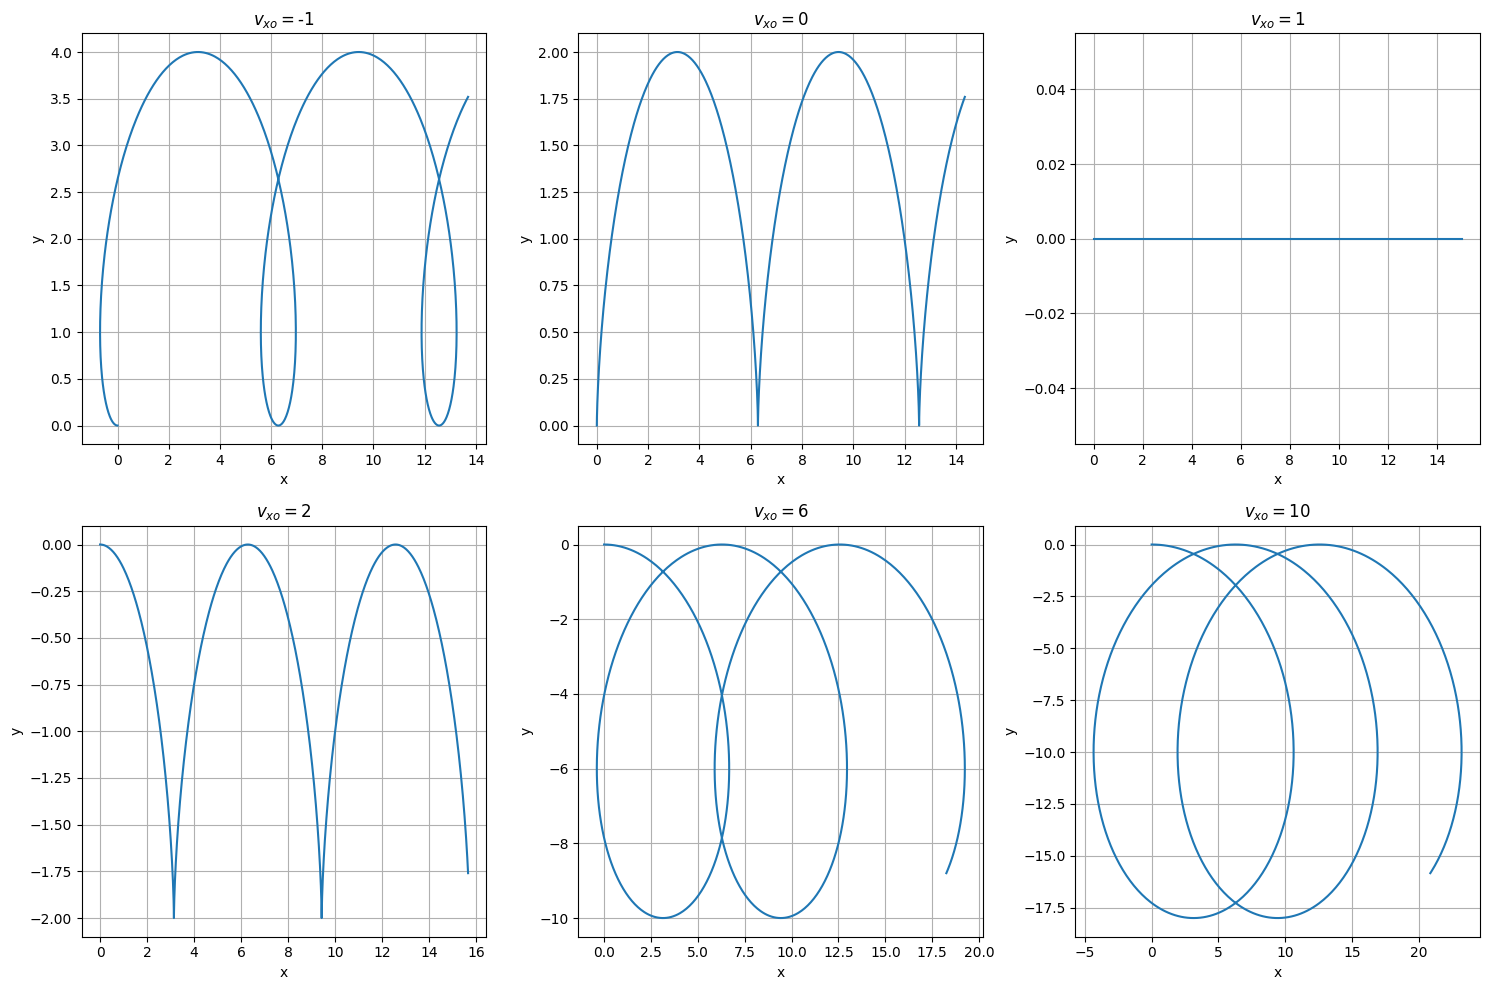

In [100]:
# 2.55

# constants
v_dr = 1
omega = 1
v_xo = 1 
vx = np.array([-1, 0, 1, 2, 6, 10])

# time 
t = np.linspace(0, 15, 1000)

# plot
fig, axs = plt.subplots(2, 3, figsize=(15, 10), layout='tight')
axs = axs.flatten()
for i, v in enumerate(vx):
    x = (v - v_dr) / omega * np.sin(omega * t) + v_dr * t
    y = (v - v_dr) / omega * (np.cos(omega * t) - 1)
    axs[i].plot(x, y)
    axs[i].set_xlabel('x')
    axs[i].set_ylabel('y')
    axs[i].grid(True)
    axs[i].set_title('$v_{xo} = $' + str(v))
plt.show()